In [30]:
def u(x):
	return 10*x*x

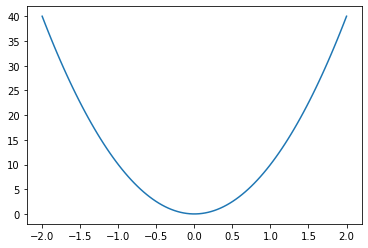

In [31]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2, 2, 100)
plt.plot(x, u(x), label='linear') 

0:  |F(x)| = 29.1219; step 1
1:  |F(x)| = 10.8323; step 1
2:  |F(x)| = 3.16294; step 1
3:  |F(x)| = 0.0662828; step 1
4:  |F(x)| = 0.00358701; step 1
5:  |F(x)| = 0.000106737; step 1
6:  |F(x)| = 2.1339e-06; step 1
L_operator: 2.1339e-06


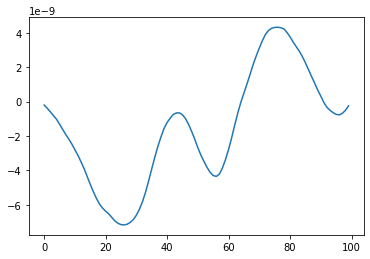

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import newton_krylov
from numpy import zeros_like, zeros
# parameters
nx = 100
hx  = 1./(nx-1)

def u(x):
	return 100*x*x

P_left, P_right = 0, 0

_lambda = 0.5

pi2 = np.pi *np.pi

def L_operator(P):
    d2x = zeros_like(P)
    d2y = zeros_like(P)

    d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
    d2x[0]    = (P[1]    - 2*P[0]    +P_left)/hx/hx
    d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx
 
    up = [ u(i*hx-0.5)*p for i, p in enumerate(P) ]

    return d2x   + _lambda * P / pi2

# solve
guess = zeros(nx, float) + 1
#guess = [ np.exp(-u(i*hx-0.5)) for i in range(nx) ]
sol = newton_krylov(L_operator, guess, method='lgmres', maxiter= 1000, verbose=1)
print('L_operator: %g' % abs(L_operator(sol)).max())

plt.plot(sol, label='sol');


In [66]:
from ipywidgets import interactive
MAX_N = 1000
def plot_func(index):
	global _lambda
	_lambda = index/10.0
	#guess = [ np.exp(-u(i*hx-0.5)) for i in range(nx) ]
	guess = zeros(nx, float) + 1
	sol = newton_krylov(L_operator, guess, method='lgmres', maxiter= 1000, verbose=0)
	print('L_operator: %g' % abs(L_operator(sol)).max())
	plt.plot(sol, label='sol')
	plt.suptitle(str(_lambda))
w = interactive(plot_func, index = (1, MAX_N))
w

interactive(children=(IntSlider(value=500, description='index', max=1000, min=1), Output()), _dom_classes=('wi…

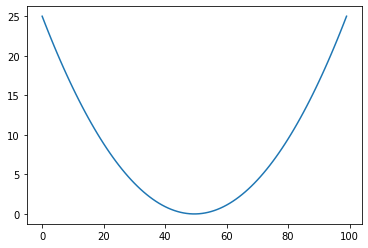

In [42]:
guess = zeros(nx, float)
up = [ u(i*hx-0.5) for i, g in enumerate(guess) ]
plt.plot(up, label='sol');